In [1]:
# Import necessary libraries
import pandas as pd 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [2]:
# Create a DataFrame with the given data
data = {     
    'Size' : [1,2,3,4,5,6,7,8,9,10],     
    'Price' : [3,6,11,18,27,38,51,66,83,102] 
}
df = pd.DataFrame(data)
df.head()

,Size,Price
0,1,3
1,2,6
2,3,11
3,4,18
4,5,27


In [3]:
# Separate features (X) and target (y) variables
X = df[['Size']] 
y = df['Price']

In [4]:
# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Initialize and build the Lasso Regression model with polynomial feature preprocessing
lasso = Pipeline([     
    ('PolynomialModel', PolynomialFeatures(degree=5)),  # Preprocessing with polynomial features of degree 2
    ('LinearModel', Lasso(alpha=0.2))  # Lasso Regression with regularization strength alpha=0.2
])

In [6]:
# Fit the model to the training data
lasso.fit(X_train, y_train)

d:\ArtifialMeachanine\py10venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+00, tolerance: 7.503e-01
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('PolynomialModel', PolynomialFeatures(degree=5)),
                ('LinearModel', Lasso(alpha=0.2))])

In [7]:
# Make predictions on the test set
y_pred = lasso.predict(X_test)

compareValues = pd.DataFrame({"ActualValue" : y_test, 'PredictedValue' : y_pred})
compareValues

,ActualValue,PredictedValue
8,83,83.119881
1,6,6.087435
5,38,37.911921


In [8]:
# Output the Mean Squared Error And Round Square Error of the model's predictions
print(f'MSE : {mean_squared_error(y_test, y_pred)}') 
print(f'R2 : {r2_score(y_test, y_pred)}') 

MSE : 0.009924711914237555
R2 : 0.9999900509682303


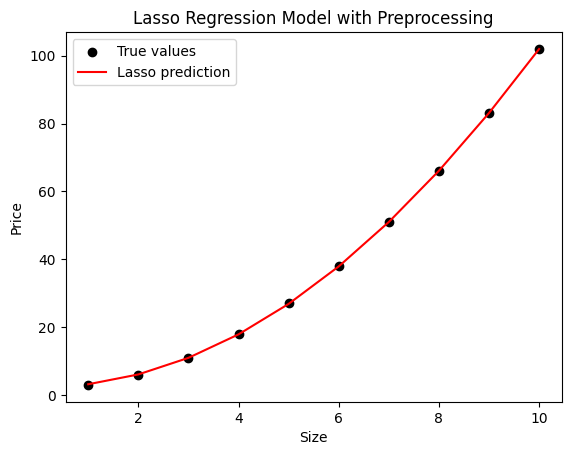

In [9]:
# Plot the true data points and the model's predictions
plt.scatter(X, y, color='black', label='True values')  # True values as scatter plot
plt.plot(X, lasso.predict(X), color='red', label='Lasso prediction')  # Predicted values as line plot
plt.legend()
plt.xlabel('Size')  # X-axis label
plt.ylabel('Price')  # Y-axis label
plt.title('Lasso Regression Model with Preprocessing')  # Plot title
plt.show()